In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
captacao = pd.read_csv('https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202307.zip', sep=';')
cadastro = pd.read_csv('https://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv', sep=';', encoding='latin1')
extrato = pd.read_csv('https://dados.cvm.gov.br/dados/FI/DOC/EXTRATO/DADOS/extrato_fi.csv', sep=';', encoding='latin1')

C:\Users\KARDEC\AppData\Local\Temp\ipykernel_39256\4141569370.py:2: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  cadastro = pd.read_csv('https://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv', sep=';', encoding='latin1')
C:\Users\KARDEC\AppData\Local\Temp\ipykernel_39256\4141569370.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  extrato = pd.read_csv('https://dados.cvm.gov.br/dados/FI/DOC/EXTRATO/DADOS/extrato_fi.csv', sep=';', encoding='latin1')


In [3]:
cadastro = cadastro[['CNPJ_FUNDO', 'DENOM_SOCIAL', 'SIT', 'GESTOR', 'CLASSE_ANBIMA']]
extrato = extrato[['CNPJ_FUNDO', 'CONDOM']]

In [4]:
df = captacao.merge(cadastro, on='CNPJ_FUNDO').merge(extrato, on='CNPJ_FUNDO')

In [5]:
df.dropna(inplace=True)

In [6]:
colunas = {
    'TP_FUNDO': 'tipo',
    'CNPJ_FUNDO': 'cnpj',
    'DT_COMPTC': 'data',
    'VL_TOTAL': 'ativo',
    'VL_QUOTA': 'cota',
    'VL_PATRIM_LIQ': 'pl',
    'CAPTC_DIA': 'captacao',
    'RESG_DIA': 'resgate',
    'NR_COTST': 'cotistas',
    'DENOM_SOCIAL': 'nome',
    'SIT': 'situacao',
    'GESTOR': 'gestora',
    'CLASSE_ANBIMA': 'classe',
    'CONDOM': 'condominio'
}

In [7]:
df.rename(columns=colunas, inplace=True)

In [8]:
df = df[df['gestora'].apply(lambda txt: 'BB' in txt)]

In [9]:
## Qual o PL da classe 'Renda Fixa Simples' no dia 31/07/2023?

pl = df.query("classe == 'Renda Fixa Simples' and data == '2023-07-31'")['pl'].sum()

print(f'O PL no dia 31/07/2023 para a RF simples era de: R$ {pl:,.2f}')


O PL no dia 31/07/2023 para a RF simples era de: R$ 224,143,769,830.25


In [10]:
df = df[(df['data'] == '2023-07-31') & (df['pl'] != 0)]

In [11]:
df['max_pl'] = df['pl'].max()
df['perc_pl_max'] = df['pl'] / df['max_pl']

Text(0.5, 1.0, 'Valor de PL por Classe')

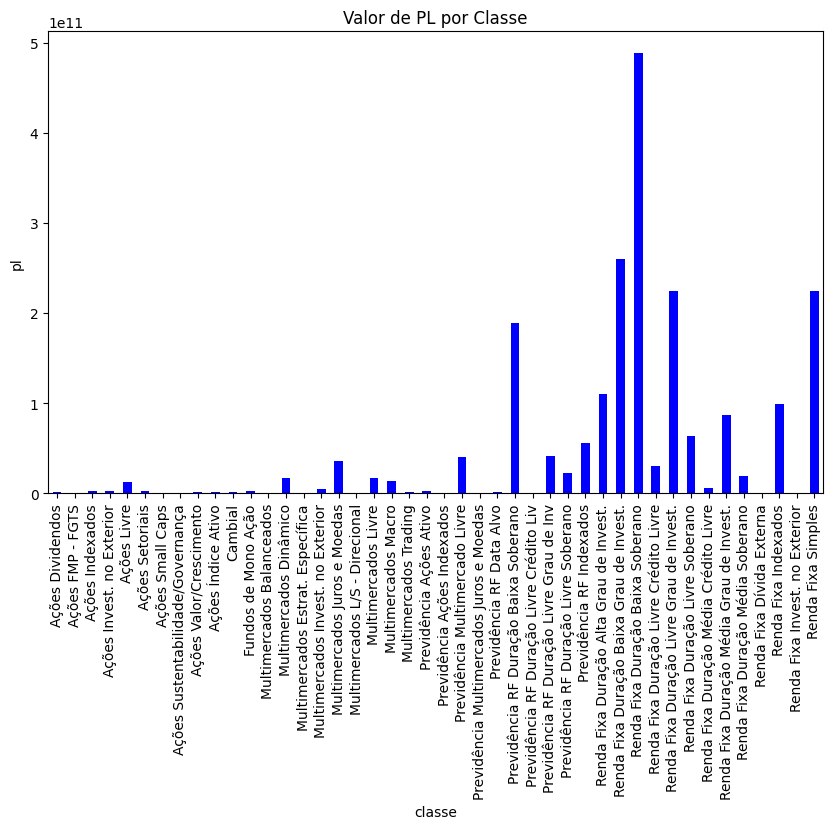

In [12]:
pl_por_classe = df.groupby('classe')['pl'].sum()

plt.figure(figsize=(10, 6))
pl_por_classe.plot(kind='bar', color='blue')

# Configurar os rótulos e título do gráfico
plt.xlabel('classe')
plt.ylabel('pl')
plt.title('Valor de PL por Classe')